## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pandas import DataFrame
import seaborn as sns
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results,on="Mouse ID",how="outer")
# Displaying the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
mouse_count = merge_df["Mouse ID"].nunique()
print("There are " + str(mouse_count) + " unique mice within the data")

There are 249 unique mice within the data


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
drop_duplicates = merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
drop_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Creainge a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [5]:
# Checking the number of mice in the clean DataFrame.
sorted_df = merge_df.groupby(["Mouse ID","Timepoint"])
find_dupes = sorted_df.head()
duplicates = find_dupes[find_dupes.duplicated(["Mouse ID","Timepoint"])]

In [6]:
#Only way i could get the groupby to implicitly create an index
drop_duplicates = find_dupes.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df=drop_duplicates

## Summary Statistics

In [7]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean2 = clean_df.groupby(["Drug Regimen"])



mean= clean2["Tumor Volume (mm3)"].mean()
median = clean2["Tumor Volume (mm3)"].median()
std_dev = clean2["Tumor Volume (mm3)"].std()
sem = clean2["Tumor Volume (mm3)"].sem()
var = clean2["Tumor Volume (mm3)"].var()
summary_df = pd.DataFrame({"Mean":mean,
                           "Median":median,
                           "Variance":var,
                           "Standard Deviation":std_dev,
                           "SEM":sem
                           })
# summary_df.set_index('Drug Regimen', inplace=True)
summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


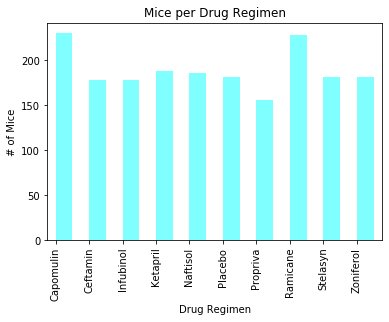

In [8]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
# This method produces everything in a single groupby function
mice_total = clean2["Mouse ID"].count()
regimen = list(mice_total.index)
ticks = np.arange(len(list(mice_total.index)))
per_regimen = mice_total.values

plot = mice_total.plot.bar(title="Mice per Drug Regimen", color="cyan", alpha=.5,align="edge")
plot.set_ylabel("# of Mice")
plot.set_xlabel("Drug Regimen")
plot

## Bar and Pie Charts

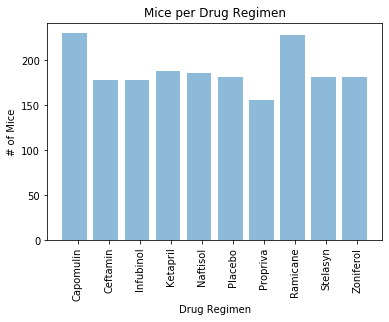

In [9]:
# Generated a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Matplotlib
mice_total = clean2["Mouse ID"].count()
regimen = list(mice_total.index)
ticks = np.arange(len(list(mice_total.index)))
per_regimen = mice_total.values


plt.bar(ticks-0.5, per_regimen, alpha=0.5, align="edge")
plt.xticks(ticks, regimen, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("Mice per Drug Regimen")
plt.show()


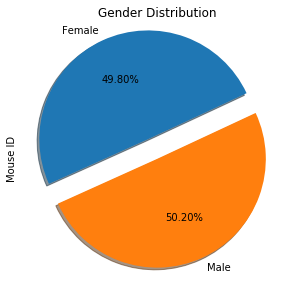

In [49]:
# Generated a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex"]).nunique()
#gender_group.head()
explode = (.2,0)
gender_group2 = gender_group["Mouse ID"].head()
gender_group2.plot(kind="pie", figsize=(7,5), explode=explode, shadow=True, startangle=25, title="Gender Distribution", autopct= "%.2f%%")
plt.show()
#this is still wildly incomplete skip past
# need to generate a pie plot showing the distribution of female versus male mice using pyplot

Text(0.5, 1.0, 'Gender Distribution')

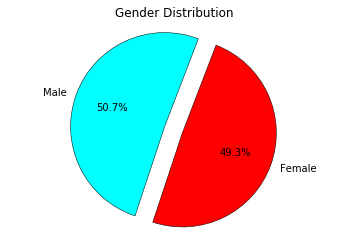

In [11]:
# need to generate a pie plot showing the distribution of female versus male mice using pyplot
names = clean_df["Sex"].unique()
counts =  clean_df["Sex"].value_counts()
plt.pie(counts, labels=names, colors =("cyan","red"), autopct='%1.1f%%', wedgeprops = {'linewidth': .5, 'edgecolor':'black'}, startangle=69, explode=explode)
plt.axis("equal")
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [22]:
# Trying to calculate the final tumor volume of each mouse across four of the treatment regimens:  (needing each mice's final tumor volume under these specific regimens)
max_timepoint = clean_df.groupby(["Mouse ID"]).max()
regimen_max = max_timepoint.loc[(max_timepoint["Drug Regimen"] == "Capomulin")|(max_timepoint["Drug Regimen"] == "Ramicane")|
                                         (max_timepoint["Drug Regimen"] == "Infubinol")|(max_timepoint["Drug Regimen"] == "Ceftamin")]

final_vol = regimen_max.reset_index()
final_vol

group = final_vol.groupby(["Drug Regimen"]).head()
group
final_group = final_vol.set_index(["Drug Regimen"]) 
final_group1


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,45,67.973419,2
Infubinol,a251,Female,21,25,45,65.525743,1
Ceftamin,a275,Female,20,28,45,62.999356,3
Ramicane,a411,Male,3,22,45,45.466677,1
Ramicane,a444,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...
Ceftamin,y769,Female,6,27,45,68.594745,4
Capomulin,y793,Male,17,17,45,45.000000,2
Ceftamin,y865,Male,23,26,45,64.729837,3


In [26]:
# Putting treatments into a list for for loop (and later for plot labels)
Capolmulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

for row, col in regimen_group.iterrows():
    if row == "Capolmulin" :
        Capolmulin.append(col["Tumor Volume (mm3)"])
    elif row == "Ramicane":
        Ramicane.append(col["Tumor Volume (mm3)"])
    elif row == "Infubinol":
        Infubinol.append(col["Tumor Volume (mm3)"])
    elif row == "Ceftamin":
        Ceftamin.append(col["Tumor Volume (mm3)"])
        

In [37]:
Ceftamin_df = DataFrame(Ceftamin,columns=['Ceftamin'])
Infubinol_df = DataFrame(Infubinol,columns=['Infubinol'])
Ramicane_df = DataFrame(Ramicane,columns=['Ramicane'])
Capolmulin_df = DataFrame(Capolmulin,columns=['Capolmulin'])

frames = [Ceftamin_df,Infubinol_df,Ramicane_df,Capolmulin_df]
Top_4 = pd.concat(frames)

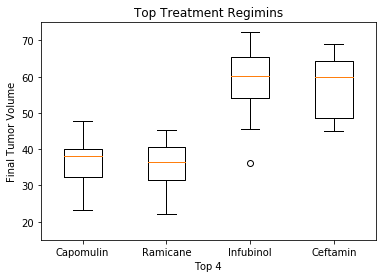

In [45]:
top_regimens_sort = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
top_regimen_df = top_regimens_sort.to_frame()
top_regimen_df

# Put treatments into a list for for loop (and later for plot labels)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create list to fill with tumor vol data (for plotting)
tumor_vol_lists = (top_regimen_df.reset_index()).groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_regimen_df = top_regimen_df.reset_index()
tumor_lists = final_regimen_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)   
    
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]    
    
# add subset 
plt.boxplot(tumor_vols, labels=top_4)    
    
# Determine outliers using upper and lower bounds
plt.ylim(15, 75)
plt.title("Top Treatment Regimins")
plt.xlabel("Top 4")
plt.ylabel("Final Tumor Volume")
plt.show()

In [29]:
# need to generate a box plot of the final tumor volume of each mouse across four regimens of interest
Last_df = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
New_df = Last_df.to_frame()

In [30]:
New_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

## Line and Scatter Plots

In [ ]:
# need to generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_tumor = pymaceuticals[pymaceuticals["Mouse ID"].isin(["b128"])]
time_tumor

#time_tumor_data = time_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#time_tumor_data

#line_df = time_tumor_data.reset_index()
line_df

#line_final = line_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#line_final
plt.plot(time_tumor["Timepoint"], time_tumor["Tumor Volume (mm3)"])
#time_t.plot.line()
plt.title("B128 Capolumin Treatment")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

In [ ]:
# need to generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Locate Specific Regimen
capomulin_scatter = pymaceuticals.loc[pymaceuticals["Drug Regimen"]== "Capomulin"]

# Group average weight of tumor valume then replace with plain index
capomulin_grouped_weight = capomulin_scatter.groupby(["Weight (g)"]).mean()
capomulin_grouped_weight = capomulin_grouped_weight.reset_index()
capomulin_grouped_weight

# Set up axes
plt.scatter(capomulin_grouped_weight["Weight (g)"], capomulin_grouped_weight["Tumor Volume (mm3)"] )
plt.title("Capolumin Treatment Scatter Plot")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")

plt.show()

## Correlation and Regression

In [48]:
#need to calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
fig = plt.figure(figsize=(10, 10))
sns.lmplot(x= "Weight (g)", y="Tumor Volume (mm3)", data=capomulin_grouped_weight, fit_reg=True) 

# Label
plt.title('Relationship between mouse weight and average tumor volume for the Capomulin regimen', size=30)
plt.xlabel('Weight (g)', size=20)
plt.ylabel('Tumor Volume (mm3)', size=20);

NameError: name 'capomulin_grouped_weight' is not defined

<Figure size 720x720 with 0 Axes>